## Maret Ismoyo

### Import Library

In [1]:
# main library
import numpy as np
import pandas as pd

# data exploration
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# modelling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# menghapus pesan warning ketika running time
import warnings
warnings.filterwarnings('ignore')

### Load and Read Data

In [2]:
files = pd.read_csv('customer_churn_dataset.csv')
files.head(10)

,customer_id,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
0,285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
1,f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
2,09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
3,11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
4,a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
5,fe7d85497167d0e0ad78b067ce5027d0,Kartu A,9821.90,19623.45,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,1692,0
6,0be864c61321827ecb0ba7ba43c78227,Kartu A,109855.17,77300.67,0.0,0.0,0.00,87763.5,146938.0,660.0,1155.0,44280.5,6,4348,0
7,e2f2824dbef8cebbf2fc784775f83757,Kartu A,91120.33,70059.92,0.0,0.0,0.00,85701.0,62205.0,264.0,3432.0,15378.0,15,1963,0
8,838bf8775315c79375a4684c73963884,Kartu A,13321.00,13018.50,0.0,0.0,0.00,1716.0,1287.0,0.0,0.0,0.0,15,1932,0
9,b5872b3fd78ff00f85a5820638ad875a,Kartu A,82826.70,124709.38,0.0,129999.1,43333.03,10296.0,12012.0,0.0,0.0,123333.1,15,3020,0


In [3]:
files.shape

(10000, 15)

In [4]:
files.columns

Index(['customer_id', 'product', 'reload_1', 'reload_2', 'video', 'music',
       'games', 'chat_1', 'chat_2', 'socmed_1', 'socmed_2', 'internet',
       'days_active', 'tenure', 'churn'],
      dtype='object')

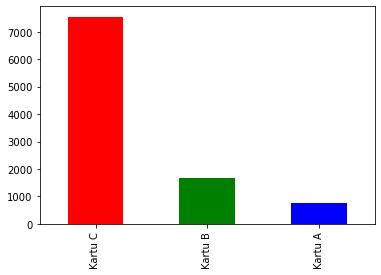

In [5]:
files['product'].value_counts().plot(kind='bar', 
                                     color=['red', 'green','blue'])
plt.show()

### Preprocessing Data

In [6]:
le = LabelEncoder()
files['product'] = le.fit_transform(files['product'])

In [7]:
file = files.drop('customer_id', axis=1)
file.shape

(10000, 14)

In [8]:
scaler = MinMaxScaler()
n_file = pd.DataFrame(scaler.fit_transform(file))
n_file.columns = file.columns
n_file.head()

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
0,0.0,0.001138,0.001957,0.0317,0.042926,0.038048,0.000440,0.000470,0.000000,0.002689,0.001897,1.000000,0.067946,0.0
1,0.0,0.001084,0.002129,0.0000,0.000000,0.000000,0.000000,0.003383,0.000000,0.000000,0.012785,0.866667,0.019527,0.0
2,0.0,0.003823,0.005387,0.0000,0.000000,0.000000,0.022256,0.020733,0.001094,0.005042,0.004736,1.000000,0.206235,0.0
3,0.0,0.000008,0.000087,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.011876,0.0
4,0.0,0.003909,0.006121,0.0000,0.000000,0.016304,0.030463,0.022987,0.000000,0.000000,0.011010,1.000000,0.102775,0.0


In [9]:
X = n_file.iloc[:,:-1]
y = n_file.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=67, 
                                                    test_size=.3, stratify=y)
print(X_train.shape, X_test.shape, 
      y_train.shape, y_test.shape)

(7000, 13) (3000, 13) (7000,) (3000,)


In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

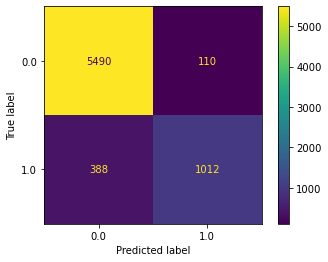

In [11]:
plot_confusion_matrix(knn, X_train, y_train)
plt.show()

### Classification

In [12]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      5600
         1.0       0.90      0.72      0.80      1400

    accuracy                           0.93      7000
   macro avg       0.92      0.85      0.88      7000
weighted avg       0.93      0.93      0.93      7000



In [13]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2400
         1.0       0.84      0.63      0.72       600

    accuracy                           0.90      3000
   macro avg       0.88      0.80      0.83      3000
weighted avg       0.90      0.90      0.90      3000



### Accuracy

In [14]:
# print('Accuracy Score for Training Dataset = ', accuracy_score(y_train, knn.predict(X_train)))
# print('Accuracy Score for Testing Dataset = ', accuracy_score(y_test, knn.predict(X_test)))
akurasi_training = accuracy_score(y_train, knn.predict(X_train))
akurasi_testing = accuracy_score(y_test, knn.predict(X_test))
print(f'Accuracy Score for Training Dataset = {float(akurasi_training):.2}')
print(f'Accuracy Score for Testing Dataset = {float(akurasi_testing):.2}')

Accuracy Score for Training Dataset = 0.93
Accuracy Score for Testing Dataset = 0.9


### Precision

In [15]:
# print('Precision Score for Training Dataset = ', precision_score(y_train, knn.predict(X_train)))
# print('Precision Score for Testing Dataset = ', precision_score(y_test, knn.predict(X_test)))
presisi_training = precision_score(y_train, knn.predict(X_train))
presisi_testing = precision_score(y_test, knn.predict(X_test))
print(f'Precision Score for Training Dataset = {float(presisi_training):.2}')
print(f'Precision Score for Testing Dataset = {float(presisi_testing):.2}')

Precision Score for Training Dataset = 0.9
Precision Score for Testing Dataset = 0.84


### Recall

In [16]:
# print('Recall Score for Training Dataset = ', recall_score(y_train, knn.predict(X_train)))
# print('Recall Score for Testing Dataset = ', recall_score(y_test, knn.predict(X_test)))
recall_training = recall_score(y_train, knn.predict(X_train))
recall_testing = recall_score(y_test, knn.predict(X_test))
print(f'Recall Score for Training Dataset = {float(recall_training):.2}')
print(f'Recall Score for Testing Dataset = {float(recall_testing):.2}')

Recall Score for Training Dataset = 0.72
Recall Score for Testing Dataset = 0.63


### Visualization

In [17]:
# accuracy
acc_training = []
acc_test = []

for i in range(3,13,1):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  acc_training.append(accuracy_score(y_train, model.predict(X_train)))
  acc_test.append(accuracy_score(y_test, model.predict(X_test)))

In [18]:
# Precision
prec_training = []
prec_test = []

for i in range(3,13,1):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  prec_training.append(precision_score(y_train, model.predict(X_train)))
  prec_test.append(precision_score(y_test, model.predict(X_test)))

In [19]:
# Recall
rec_training = []
rec_test = []

for i in range(3,13,1):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  rec_training.append(recall_score(y_train, 
                                   model.predict(X_train)))
  rec_test.append(recall_score(y_test, 
                               model.predict(X_test)))

In [20]:
metr = pd.DataFrame({'k' : range(3,13), 
                     'Training Accuracy' : acc_training, 
                     'Testing Accuracy' : acc_test,
                     'Training Precision' : prec_training, 
                     'Testing Precision' : prec_test,
                     'Training Recall' : rec_training, 
                     'Testing Recall' : rec_test,})
metr

,k,Training Accuracy,Testing Accuracy,Training Precision,Testing Precision,Training Recall,Testing Recall
0,3,0.944571,0.905667,0.914754,0.826804,0.797143,0.668333
1,4,0.926714,0.901333,0.941294,0.865385,0.675714,0.600000
2,5,0.928857,0.902000,0.901961,0.837004,0.722857,0.633333
3,6,0.917286,0.898333,0.922760,0.866005,0.640000,0.581667
4,7,0.918571,0.900000,0.887127,0.839367,0.679286,0.618333
5,8,0.909429,0.895333,0.913607,0.866667,0.604286,0.563333
6,9,0.909429,0.895333,0.882236,0.840476,0.631429,0.588333
7,10,0.903714,0.891333,0.893709,0.854922,0.588571,0.550000
8,11,0.905000,0.895000,0.870838,0.840095,0.616429,0.586667
9,12,0.900000,0.886667,0.883772,0.847594,0.575714,0.528333


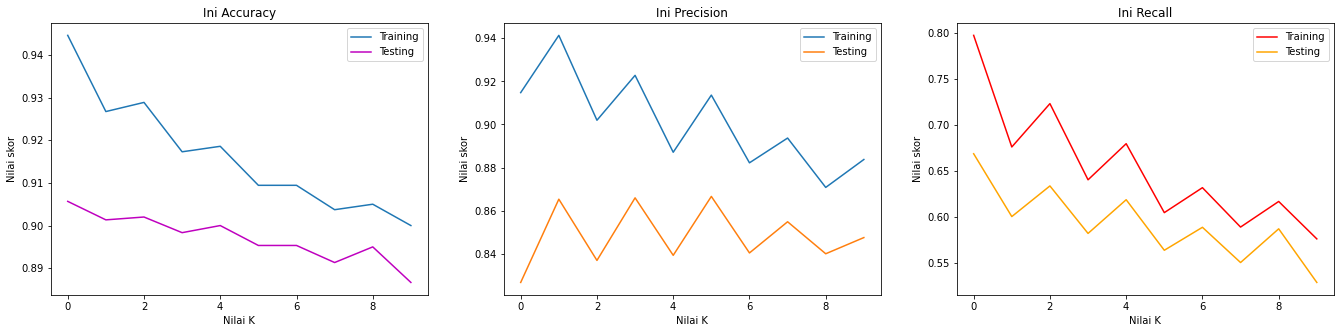

In [21]:
# mengatur panjang dan lebar grafik
plt.figure(figsize=(23,5))
# Line plot Accuracy
plt.subplot(131)
plt.title("Ini Accuracy")
plt.xlabel('Nilai K')
plt.ylabel('Nilai skor')
plt.plot(metr['Training Accuracy'].values)
plt.plot(metr['Testing Accuracy'].values,'m')
plt.legend(labels=['Training','Testing'], loc='best')
# Line plot Precision
plt.subplot(132)
plt.title("Ini Precision")
plt.xlabel('Nilai K')
plt.ylabel('Nilai skor')
plt.plot(metr['Training Precision'].values)
plt.plot(metr['Testing Precision'].values)
plt.legend(labels=['Training','Testing'], loc='best')
# Line plot Recall
plt.subplot(133)
plt.title("Ini Recall")
plt.xlabel('Nilai K')
plt.ylabel('Nilai skor')
plt.plot(metr['Training Recall'].values, 'red')
plt.plot(metr['Testing Recall'].values, 'orange')
plt.legend(labels=['Training','Testing'], loc='best')
plt.show()

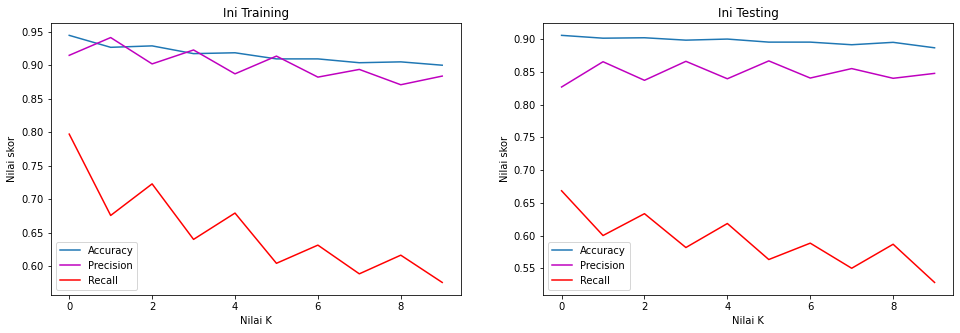

In [22]:
# mengatur panjang dan lebar grafik
plt.figure(figsize=(25,5))

# Bagian plot training data
plt.subplot(131)
plt.title("Ini Training")
plt.xlabel('Nilai K')
plt.ylabel('Nilai skor')
plt.plot(metr['Training Accuracy'].values)
plt.plot(metr['Training Precision'].values,'m')
plt.plot(metr['Training Recall'].values, 'red')
plt.legend(labels=['Accuracy','Precision', 'Recall'], loc='best')

# Bagian plot testing data
plt.subplot(132)
plt.title("Ini Testing")
plt.xlabel('Nilai K')
plt.ylabel('Nilai skor')
plt.plot(metr['Testing Accuracy'].values)
plt.plot(metr['Testing Precision'].values,'m')
plt.plot(metr['Testing Recall'].values, 'red')
plt.legend(labels=['Accuracy','Precision', 'Recall'], loc='best')
plt.show()

In [23]:
metr

,k,Training Accuracy,Testing Accuracy,Training Precision,Testing Precision,Training Recall,Testing Recall
0,3,0.944571,0.905667,0.914754,0.826804,0.797143,0.668333
1,4,0.926714,0.901333,0.941294,0.865385,0.675714,0.600000
2,5,0.928857,0.902000,0.901961,0.837004,0.722857,0.633333
3,6,0.917286,0.898333,0.922760,0.866005,0.640000,0.581667
4,7,0.918571,0.900000,0.887127,0.839367,0.679286,0.618333
5,8,0.909429,0.895333,0.913607,0.866667,0.604286,0.563333
6,9,0.909429,0.895333,0.882236,0.840476,0.631429,0.588333
7,10,0.903714,0.891333,0.893709,0.854922,0.588571,0.550000
8,11,0.905000,0.895000,0.870838,0.840095,0.616429,0.586667
9,12,0.900000,0.886667,0.883772,0.847594,0.575714,0.528333


In [24]:
high_training_accuracy = max(acc_training)
high_testing_accuracy = max(acc_test)
high_training_precision = max(prec_training)
high_testing_precision = max(prec_test)
high_training_recall = max(rec_training)
high_testing_recall = max(rec_test)
print(f'Akurasi training terbaik adalah\t= {float(high_training_accuracy):.5}')
print(f'Akurasi testing terbaik adalah\t= {float(high_testing_accuracy):.5}')
print(f'Presisi training terbaik adalah\t= {float(high_training_precision):.5}')
print(f'Presisi testing terbaik adalah\t= {float(high_testing_precision):.5}')
print(f'Recall training terbaik adalah\t= {float(high_training_recall):.5}')
print(f'Recall testing terbaik adalah\t= {float(high_testing_recall):.5}')

Akurasi training terbaik adalah	= 0.94457
Akurasi testing terbaik adalah	= 0.90567
Presisi training terbaik adalah	= 0.94129
Presisi testing terbaik adalah	= 0.86667
Recall training terbaik adalah	= 0.79714
Recall testing terbaik adalah	= 0.66833
